使用向量空间映射字母，训练神经网络调整映射

In [201]:
import torch
from matplotlib import pyplot as plt

In [202]:
words = open("names.txt").read().splitlines()

In [203]:
char = sorted(set(''.join(words)))
stoi = {s:i+1 for i,s in enumerate(char)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [204]:
def make_data(words):
    dataX = []
    dataY = []
    for w in words:
        w = '...' + w + '.'
        for ch in zip(w,w[1:],w[2:],w[3:]):
            ch = [stoi[c] for c in ch]
            dataX.append(list(ch[:3]))
            dataY.append(ch[3])
    dataX = torch.tensor(dataX)
    dataY = torch.tensor(dataY)
    return dataX,dataY

In [205]:
dataX,dataY = make_data(words)
dataX.shape,dataY.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [214]:
dim = 10
C = torch.randn((27,dim),requires_grad=True, device='cuda') 
W1 = torch.randn((3*dim, 200), requires_grad=True, device='cuda')  # [6,30]
b1 = torch.randn(200,requires_grad=True, device='cuda') 
W2 = torch.randn((200,27), requires_grad=True, device='cuda')
b2 = torch.randn(27,requires_grad=True, device='cuda') 
parameters = [C, W1, b1, W2, b2]

# with torch.no_grad():
#     C *= 0.2
#     W1 *= 0.1
#     b *= 0.1
#     W2 *= 0.1

In [215]:
num_x = dataX.shape[0]
step = 0
loss_s = []

In [216]:
index = torch.randint(0,num_x,(1000,))


In [236]:
for i in range(100000):
    index = torch.randint(0,num_x,(10000,))
    xi = dataX[index]
    yi = dataY[index]
    xs = C[xi]
    ys = yi
    xs = xs.cuda()
    ys = ys.cuda()
    bachsize = len(xs)
                                         # X @ C   [5,3,27] @ [27,2] = [5,3,2]
    y1 = torch.tanh(xs.view(-1, 3*dim)  @ W1 + b1)
    y2 =  y1 @ W2 + b2
    # num = y2.exp()
    # probs = num / num.sum(1,keepdim=True)
    # probs_re = probs[range(bachsize), ys]
    # loss = -probs_re.log().sum() / bachsize
    loss = torch.nn.functional.cross_entropy(y2, ys)
    if i % 5000 == 0:
        print(i,loss.item())
    loss_s.append(loss.item())
    step += 1
    # break
    # 反向传播，计算梯度
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # 修改参数
    with torch.no_grad():
        for p in parameters:
            if p.grad is not None:
                p -= 0.05 * p.grad
            else :
                print("p.grad is None")
                break
    break

0 2.185713291168213


In [228]:
with torch.no_grad():
    xi = dataX
    yi = dataY
    xs = C[xi]
    ys = yi
    xs = xs.cuda()
    ys = ys.cuda()
    bachsize = len(xs)
                                         # X @ C   [5,3,27] @ [27,2] = [5,3,2]
    y1 = torch.tanh(xs.view(-1, 3*dim)  @ W1 + b1)
    y2 =  y1 @ W2 + b2
    # num = y2.exp()
    # probs = num / num.sum(1,keepdim=True)
    # probs_re = probs[range(bachsize), ys]
    # loss = -probs_re.log().sum() / bachsize
    loss = torch.nn.functional.cross_entropy(y2, ys)
    print(loss)

tensor(2.1675, device='cuda:0')


In [222]:
y2.shape

torch.Size([228146, 27])

9000 2.314805746078491
9500 2.312034845352173

2.2467
2.2217

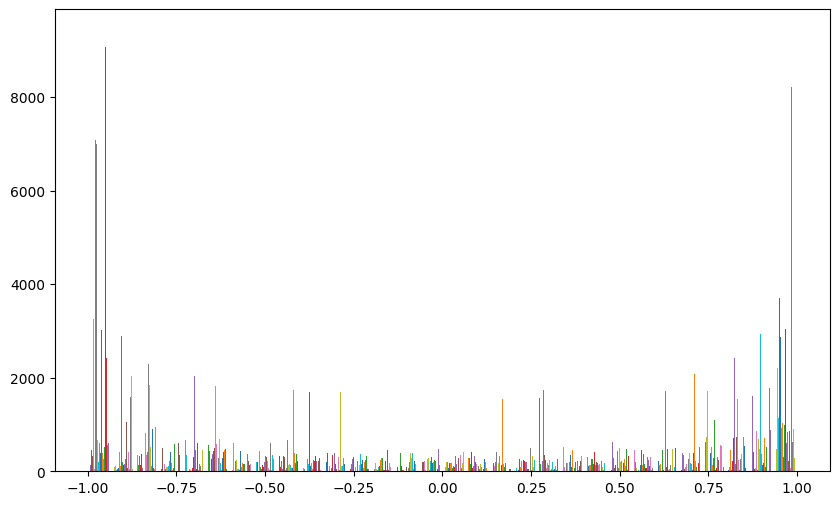

In [243]:
y2_cpu = y1.cpu().detach().numpy()
plt.figure(figsize=(10, 6))
plt.hist(y2_cpu, 30)
plt.show()

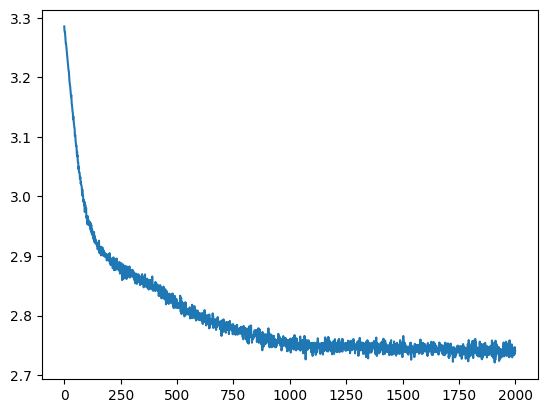

In [185]:
plt.plot(range(step),loss_s)

In [233]:
p = ''
i = 0
with torch.no_grad():
    x = [0,0,0]
    i == 0
    while True:
        xs = C[x]
        xs = xs.cuda()
        y1 = torch.tanh(xs.view(-1, 3*dim)  @ W1 + b1)
        y2 =  y1 @ W2 + b2
        num = y2.exp()
        probs = num / num.sum(1,keepdim=True)
        xi = torch.multinomial(probs,num_samples=1,replacement=True).item()
        if xi == 0:
            print(p)
            p = ''
            x = [0,0,0]
            i += 1
        else: 
            p += itos[xi]
            x = [x[1],x[2],xi]
        if i > 15:break

mallie
ney
lycu
mahimyiah
wistiayle
daniel
saily
colia
rubhezaly
ken
sace
mris
erhysemonksia
mee
jasmamitle
nair


In [115]:
y1

tensor([[ 1.0000,  0.9977, -1.0000, -0.9995,  1.0000,  0.9719, -0.7662,  0.9998,
          0.9871, -0.9022,  1.0000,  1.0000, -0.6452,  0.9536, -0.9843, -0.9997,
         -1.0000,  0.9334, -1.0000,  0.9989, -1.0000,  0.9588,  0.9997, -0.7019,
          0.9993, -0.8543,  0.9999, -1.0000, -0.1229,  0.9998]],
       device='cuda:0')

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='blue', edgecolor='black')

In [96]:
loss

tensor(2.7152, device='cuda:0', grad_fn=<DivBackward0>)

In [66]:
loss

tensor(2.7411, device='cuda:0', grad_fn=<DivBackward0>)

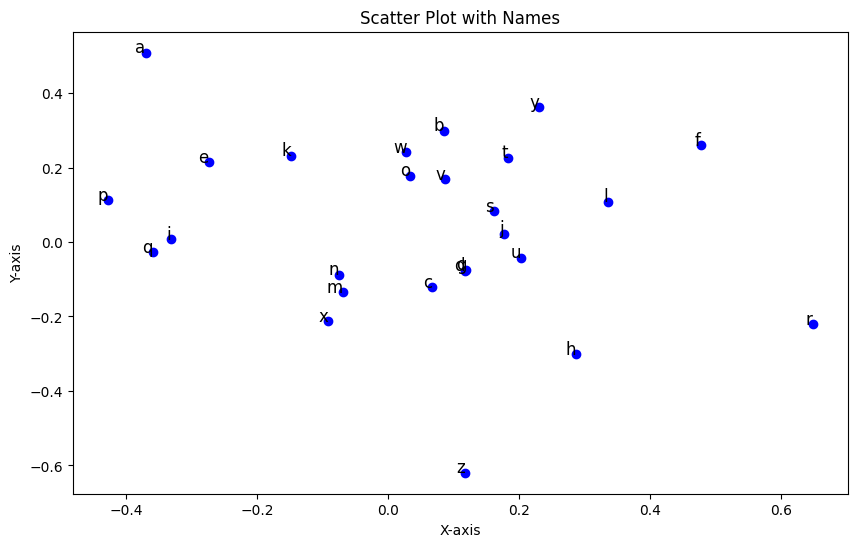

In [184]:
C_cpu = C.cpu().detach().numpy() 
names = char
x = C_cpu[1:,0]
y = C_cpu[1:,1]

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')

# 添加点的名称
for i, name in enumerate(names):
    plt.text(x[i], y[i], name, fontsize=12, ha='right')

# 添加标题和标签
plt.title('Scatter Plot with Names')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图表
plt.show()